<a href="https://colab.research.google.com/github/twishackaul/CIFAR-100-Classification/blob/main/NN_CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

X_train and X_test have 50000 and 10000 data samples respectively each of shape 32*32 with 3 RGB channels

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train.ndim

2

In [9]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

converting 2d to 1d

In [10]:
y_train = y_train.flatten()
y_train[0:5]

array([19, 29,  0, 11,  1])

In [11]:
y_train.ndim

1

In [12]:
y_train.shape

(50000,)

In [13]:
y_test = y_test.flatten()
y_test[0:5]

array([49, 33, 72, 51, 71])

In [14]:
y_test.ndim

1

In [15]:
y_test.shape

(10000,)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
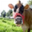

In [16]:
X_train[0]

In [17]:
'''''
Aquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'
Fish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'
Flowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'
Food containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'
Fruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'
Household electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'
Household furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'
Insects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'
Large carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'
Large man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'
Large natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'
Large omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'
Medium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'
Non-insect invertebrates: 'crab', 'lobster', 'snail', 'spider', 'worm'
People: 'baby', 'boy', 'girl', 'man', 'woman'
Reptiles: 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'
Small mammals: 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'
Trees: 'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree'
Vehicles 1: 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train'
Vehicles 2: 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'

'''''

"''\nAquatic mammals: 'beaver', 'dolphin', 'otter', 'seal', 'whale'\nFish: 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout'\nFlowers: 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips'\nFood containers: 'bottles', 'bowls', 'cans', 'cups', 'plates'\nFruit and vegetables: 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers'\nHousehold electrical devices: 'clock', 'computer keyboard', 'lamp', 'telephone', 'television'\nHousehold furniture: 'bed', 'chair', 'couch', 'table', 'wardrobe'\nInsects: 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'\nLarge carnivores: 'bear', 'leopard', 'lion', 'tiger', 'wolf'\nLarge man-made outdoor things: 'bridge', 'castle', 'house', 'road', 'skyscraper'\nLarge natural outdoor scenes: 'cloud', 'forest', 'mountain', 'plain', 'sea'\nLarge omnivores and herbivores: 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'\nMedium-sized mammals: 'fox', 'porcupine', 'possum', 'raccoon', 'skunk'\nNon-insect invertebrates: 'crab', 'lobster', 'snail

In [18]:
my_super = [
    'aquatic mammals',  # Superclass 0
    'fish',             # Superclass 1
    'flowers',          # Superclass 2
    'food containers',  # Superclass 3
    'fruit and vegetables',  # Superclass 4
    'household electrical devices',  # Superclass 5
    'household furniture',  # Superclass 6
    'insects',          # Superclass 7
    'large carnivores', # Superclass 8
    'large man-made outdoor things',  # Superclass 9
    'large natural outdoor scenes',   # Superclass 10
    'large omnivores and herbivores', # Superclass 11
    'medium-sized mammals',   # Superclass 12
    'non-insect invertebrates',  # Superclass 13
    'people',           # Superclass 14
    'reptiles',         # Superclass 15
    'small mammals',    # Superclass 16
    'trees',            # Superclass 17
    'vehicles 1',       # Superclass 18
    'vehicles 2'        # Superclass 19
]

print(my_super)

['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 'household electrical devices', 'household furniture', 'insects', 'large carnivores', 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores', 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees', 'vehicles 1', 'vehicles 2']


In [19]:
my_class = [
    'beaver', 'dolphin', 'otter', 'seal', 'whale',   # Superclass 0 : aquatic mammals
    'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',   # Superclass 1 : fish
    'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',   # Superclass 2 : flowers
    'bottles', 'bowls', 'cans', 'cups', 'plates',   # Superclass 3 : food containers
    'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',   # Superclass 4 : fruit and vegetables
    'clock', 'computer keyboard', 'lamp', 'telephone', 'television',   # Superclass 5 : household electrical devices
    'bed', 'chair', 'couch', 'table', 'wardrobe',   # Superclass 6 : household furniture
    'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',   # Superclass 7 : insects
    'bear', 'leopard', 'lion', 'tiger', 'wolf',   # Superclass 8 : large carnivores
    'bridge', 'castle', 'house', 'road', 'skyscraper',   # Superclass 9 : large man-made outdoor things
    'cloud', 'forest', 'mountain', 'plain', 'sea',   # Superclass 10 : large natural outdoor scenes
    'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',   # Superclass 11 : large omnivores and herbivores
    'fox', 'porcupine', 'possum', 'raccoon', 'skunk',   # Superclass 12 : medium-sized mammals
    'crab', 'lobster', 'snail', 'spider', 'worm',   # Superclass 13 : non-insect invertebrates
    'baby', 'boy', 'girl', 'man', 'woman',   # Superclass 14 : people
    'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',   # Superclass 15 : reptiles
    'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',   # Superclass 16 : small mammals
    'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree',   # Superclass 17 : trees
    'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',   # Superclass 18 : vehicles 1
    'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor'   # Superclass 19 : vehicles 2
]


print(my_class)

['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple tree', 'oak tree', 'palm tree', 'pine tree', 'willow tree', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn

array([[[ 79, 132, 197],
        [ 79, 132, 197],
        [ 80, 132, 197],
        ...,
        [ 79, 131, 196],
        [ 79, 131, 196],
        [ 79, 131, 196]],

       [[ 82, 136, 201],
        [ 83, 137, 201],
        [ 83, 137, 201],
        ...,
        [ 82, 136, 200],
        [ 82, 136, 200],
        [ 82, 136, 200]],

       [[ 84, 138, 199],
        [ 84, 138, 199],
        [ 85, 139, 200],
        ...,
        [ 84, 137, 199],
        [ 84, 137, 199],
        [ 83, 137, 199]],

       ...,

       [[182, 181, 181],
        [171, 167, 163],
        [218, 209, 201],
        ...,
        [158, 147, 141],
        [189, 175, 168],
        [211, 196, 189]],

       [[197, 186, 178],
        [179, 168, 160],
        [222, 209, 201],
        ...,
        [201, 189, 184],
        [203, 189, 183],
        [208, 194, 188]],

       [[202, 183, 171],
        [199, 182, 171],
        [221, 205, 196],
        ...,
        [206, 193, 190],
        [206, 193, 189],
        [204, 190, 186]]], dtype=uint8)
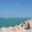

In [20]:
X_train[54]

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[54]

array([[[0.30980392, 0.51764706, 0.77254902],
        [0.30980392, 0.51764706, 0.77254902],
        [0.31372549, 0.51764706, 0.77254902],
        ...,
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745],
        [0.30980392, 0.51372549, 0.76862745]],

       [[0.32156863, 0.53333333, 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        [0.3254902 , 0.5372549 , 0.78823529],
        ...,
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373],
        [0.32156863, 0.53333333, 0.78431373]],

       [[0.32941176, 0.54117647, 0.78039216],
        [0.32941176, 0.54117647, 0.78039216],
        [0.33333333, 0.54509804, 0.78431373],
        ...,
        [0.32941176, 0.5372549 , 0.78039216],
        [0.32941176, 0.5372549 , 0.78039216],
        [0.3254902 , 0.5372549 , 0.78039216]],

       ...,

       [[0.71372549, 0.70980392, 0.70980392],
        [0.67058824, 0.65490196, 0.63921569],
        [0.85490196, 0

#**Artifical Neural Network**

In [60]:
CIFAR = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(100, activation = 'sigmoid')

])

CIFAR.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [61]:
CIFAR.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 263s 168ms/step - loss: 4.0881 - accuracy: 0.0856
Epoch 2/10
1563/1563 [==============================] - 266s 170ms/step - loss: 3.7066 - accuracy: 0.1457
Epoch 3/10
1563/1563 [==============================] - 256s 164ms/step - loss: 3.5485 - accuracy: 0.1742
Epoch 4/10
1563/1563 [==============================] - 254s 162ms/step - loss: 3.4374 - accuracy: 0.1933
Epoch 5/10
1563/1563 [==============================] - 254s 162ms/step - loss: 3.3487 - accuracy: 0.2112
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 3.2720 - accuracy: 0.2230
Epoch 7/10
1563/1563 [==============================] - 256s 164ms/step - loss: 3.2007 - accuracy: 0.2379
Epoch 8/10
1563/1563 [==============================] - 257s 164ms/step - loss: 3.1332 - accuracy: 0.2496
Epoch 9/10
1563/1563 [==============================] - 258s 165ms/step - loss: 3.0679 - accuracy: 0.2623
Epoch 10/10
1563/1563 [=======================

In [62]:
CIFAR.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 3.2930 - accuracy: 0.2233


[3.2930428981781006, 0.2232999950647354]

In [63]:
y_predA = CIFAR.predict(X_test)

313/313 [==============================] - 15s 48ms/step


In [64]:
y_predA[0]

array([0.00422363, 0.27314815, 0.8305354 , 0.75730664, 0.9150283 ,
       0.9651111 , 0.16074936, 0.5323414 , 0.9498257 , 0.83083916,
       0.709227  , 0.95072156, 0.9801064 , 0.7041261 , 0.02982225,
       0.46843398, 0.53063977, 0.95634645, 0.2710959 , 0.19715072,
       0.38837072, 0.11220299, 0.65327466, 0.8383709 , 0.5236116 ,
       0.90097773, 0.6713236 , 0.7203314 , 0.16019797, 0.5855798 ,
       0.8274203 , 0.56379765, 0.8217039 , 0.2531295 , 0.7008279 ,
       0.584451  , 0.43494198, 0.6382258 , 0.52492774, 0.91335386,
       0.8050769 , 0.5790932 , 0.4490021 , 0.05368596, 0.7910062 ,
       0.670454  , 0.8294779 , 0.08879974, 0.75900245, 0.9407824 ,
       0.52578616, 0.3216829 , 0.01133349, 0.00424188, 0.7721789 ,
       0.84472436, 0.32752365, 0.28976607, 0.86308056, 0.33474132,
       0.5952551 , 0.36235774, 0.2958546 , 0.31921715, 0.28491563,
       0.47516134, 0.26178065, 0.5795033 , 0.74255806, 0.8658596 ,
       0.12042379, 0.9542051 , 0.9091953 , 0.31402928, 0.41457

In [65]:
y_predA_new = [np.argmax(i) for i in y_predA]

In [66]:
y_predA_new[:10]

[12, 63, 15, 57, 71, 6, 63, 7, 71, 10]

In [67]:
y_test[:10]

array([49, 33, 72, 51, 71, 92, 15, 14, 23,  0])

##Confusion Matrix

In [68]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_predA_new)
CM

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[29,  1,  0, ...,  0,  0,  0],
       [ 0, 22,  1, ...,  0,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  4],
       ...,
       [ 0,  0,  3, ...,  5,  0,  4],
       [ 0,  0,  2, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 28]], dtype=int32)>

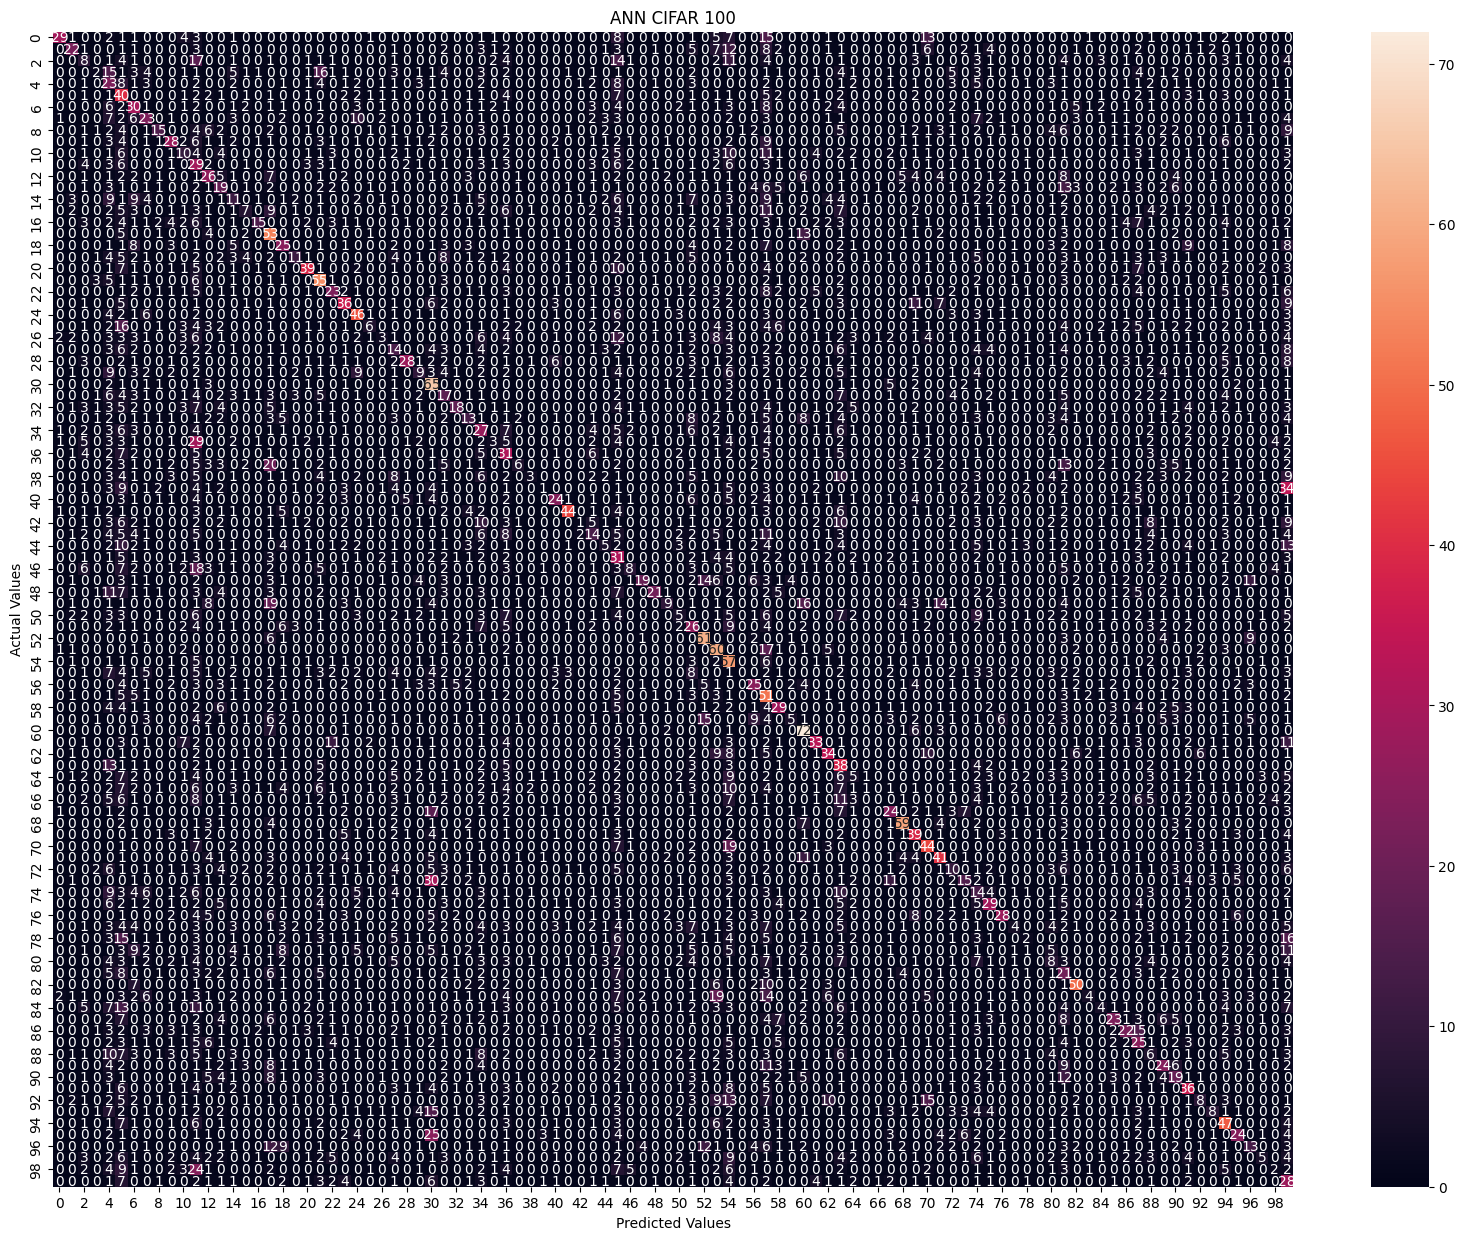

In [69]:
plt.figure(figsize = (20,15))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN CIFAR 100')
plt.show()

#**Convolutional Neural Network**

In [46]:
CNN = Sequential()

CNN.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (32, 32, 3)))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid')),

CNN.add(Flatten())

CNN.add(Dense(128, activation = 'relu'))
CNN.add(Dense(64, activation = 'relu'))
CNN.add(Dense(100, activation = 'softmax'))

CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
history = CNN.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 4.0747 - accuracy: 0.0697 - val_loss: 3.6647 - val_accuracy: 0.1261
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 3.3862 - accuracy: 0.1796 - val_loss: 3.2828 - val_accuracy: 0.2071
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.0368 - accuracy: 0.2455 - val_loss: 3.0048 - val_accuracy: 0.2588
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 2.7970 - accuracy: 0.2924 - val_loss: 2.8353 - val_accuracy: 0.2933
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 2.6272 - accuracy: 0.3293 - val_loss: 2.6986 - val_accuracy: 0.3187
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 2.4894 - accuracy: 0.3552 - val_loss: 2.6902 - val_accuracy: 0.3246
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 2.3784 - accuracy: 0.3751 - val_loss: 2.5915 -

In [48]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [49]:
y_pred[0:5]

array([[8.65960999e-07, 5.02766517e-04, 3.01998155e-03, 3.93430842e-03,
        4.14528046e-03, 9.13935306e-04, 2.95154605e-05, 4.39078169e-04,
        4.87408228e-03, 1.70536723e-03, 2.18714267e-05, 8.68998031e-05,
        1.25936970e-01, 1.87411578e-03, 3.04663536e-05, 2.86409981e-03,
        7.94222433e-05, 6.44910289e-03, 2.38737697e-03, 1.13182259e-03,
        2.19579506e-05, 2.30776976e-04, 1.50768567e-04, 3.41160782e-03,
        2.10659156e-04, 1.04961975e-03, 3.71245178e-03, 5.90547128e-03,
        9.67494543e-06, 5.60908997e-03, 2.03199908e-01, 1.30298699e-03,
        1.56564126e-03, 3.35234776e-03, 1.26450171e-03, 3.26899142e-04,
        5.51265730e-05, 5.88788930e-03, 5.39499894e-03, 3.08995950e-03,
        1.62611390e-03, 8.20890200e-05, 6.91316556e-04, 1.14776085e-05,
        3.63173825e-03, 2.66222097e-02, 9.96378250e-04, 1.63378043e-03,
        1.21918600e-03, 7.56334141e-02, 2.33317143e-03, 1.28199768e-04,
        1.18774269e-03, 8.02100217e-08, 1.13828273e-05, 2.322602

In [50]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [51]:
y_pred_new[0:5]

[30, 56, 72, 90, 71]

In [52]:
y_test[0:5]

array([49, 33, 72, 51, 71])

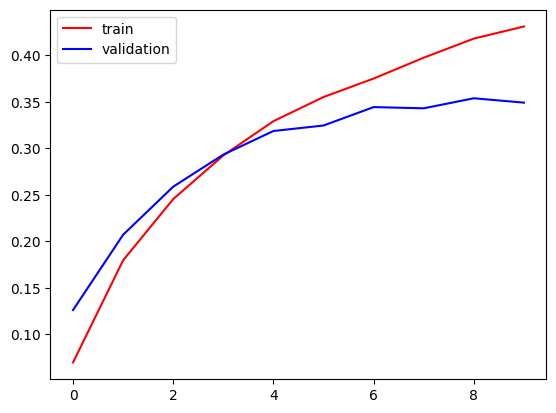

In [53]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

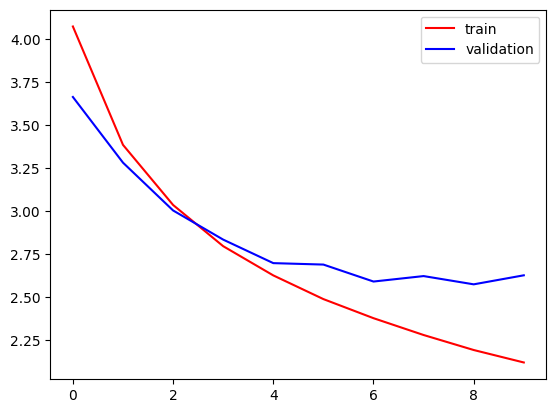

In [54]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [55]:
CM_CNN = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM_CNN

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[51,  3,  0, ...,  0,  0,  0],
       [ 0, 64,  0, ...,  0,  0,  0],
       [ 2,  0, 19, ...,  0,  4,  0],
       ...,
       [ 0,  1,  0, ..., 27,  1,  1],
       [ 1,  1,  5, ...,  0, 13,  1],
       [ 0,  0,  0, ...,  1,  0, 45]], dtype=int32)>

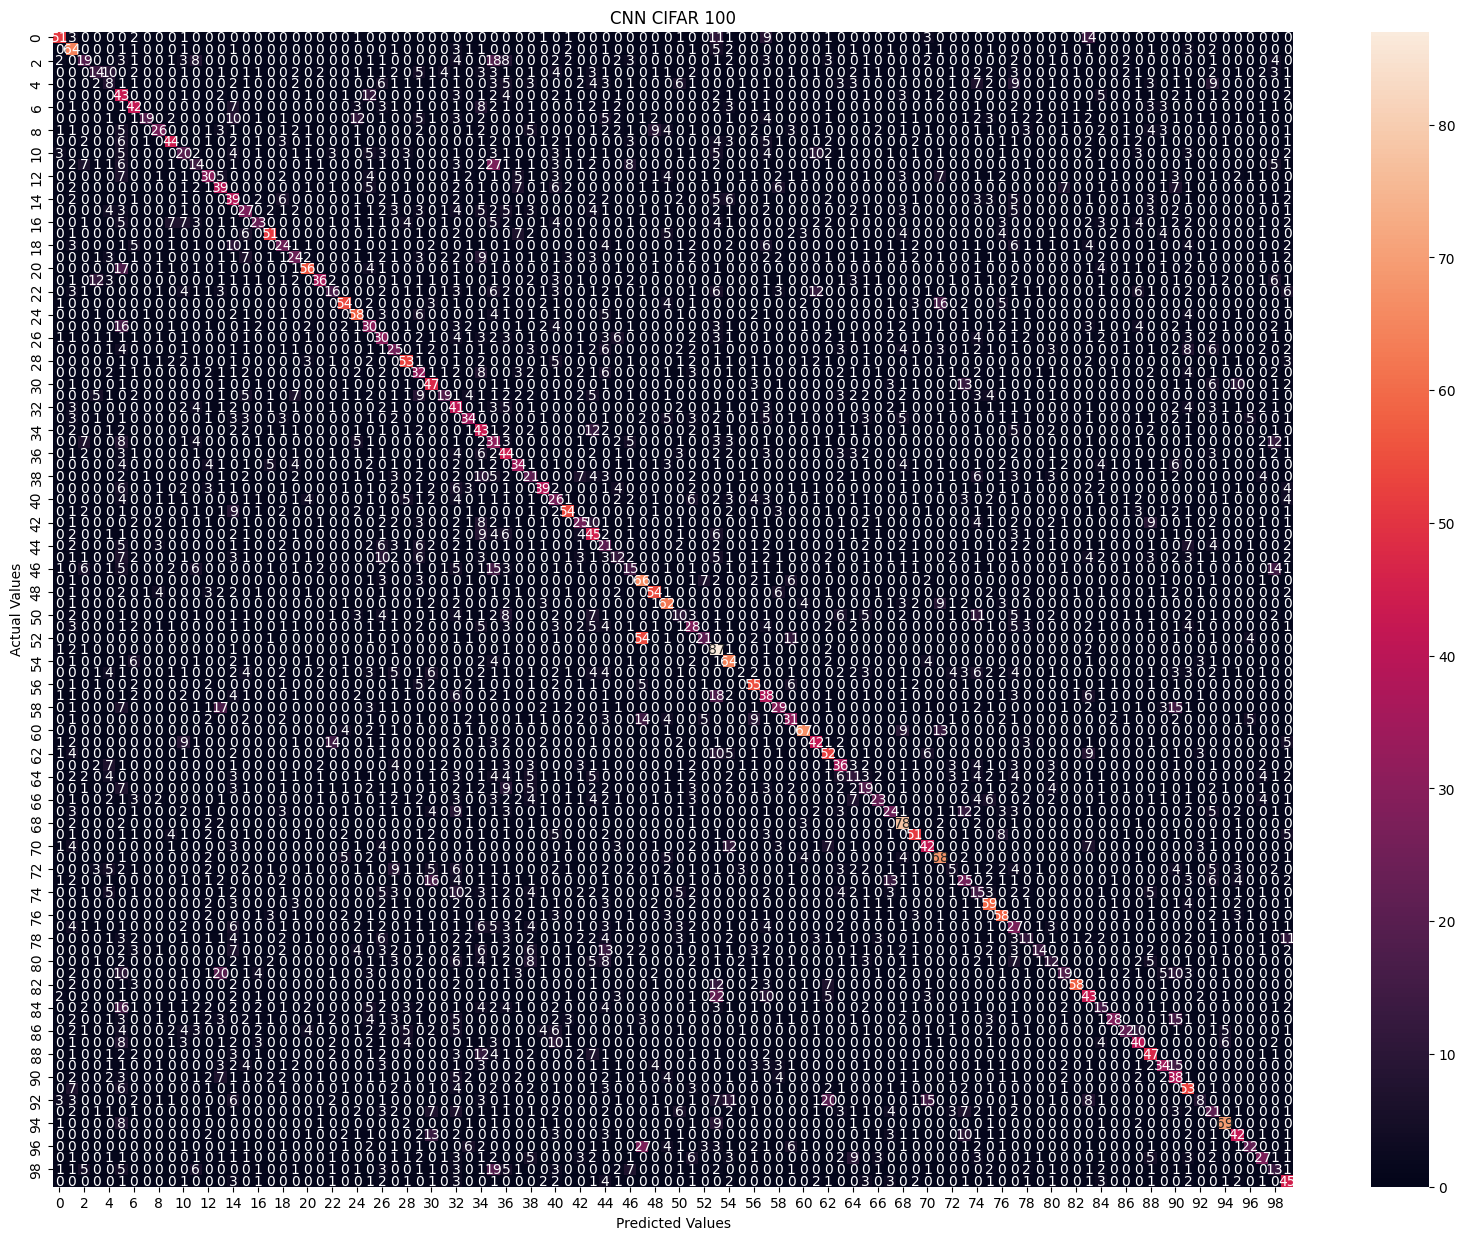

In [56]:
plt.figure(figsize = (20, 15))
sns.heatmap(CM_CNN, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('CNN CIFAR 100')
plt.show()

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59       100
           1       0.38      0.64      0.48       100
           2       0.31      0.19      0.23       100
           3       0.29      0.14      0.19       100
           4       0.11      0.08      0.09       100
           5       0.15      0.43      0.22       100
           6       0.42      0.42      0.42       100
           7       0.79      0.19      0.31       100
           8       0.51      0.26      0.34       100
           9       0.58      0.44      0.50       100
          10       0.23      0.20      0.22       100
          11       0.21      0.14      0.17       100
          12       0.37      0.30      0.33       100
          13       0.31      0.39      0.35       100
          14       0.21      0.39      0.27       100
          15       0.29      0.27      0.28       100
          16       0.43      0.23      0.30       100
          17       0.70    

In [59]:
CNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 2, 2, 128)        